In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Ensures that the display width isn't restricted
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('Network_anomaly_data.csv')
df['is_attack'] = df['attack'].apply(lambda x: 0 if x=='normal' else 1)
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0


In [4]:
scan = set(['ipsweep', 'portsweep', 'nmap', 'satan'])
dos = set(['neptune', 'smurf', 'pod', 'teardrop', 'land'])
access = set(['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezclient', 'warezmaster'])
exploit = set(['buffer_overflow', 'loadmodule', 'rootkit', 'perl'])
backdoor = set(['back','spy'])

df['attack_category'] = None

for i in range(len(df)):
  attk = df.loc[i,'attack']
  if attk in scan:
    df.loc[i,'attack_category'] = 'scan'
  elif attk in dos:
    df.loc[i,'attack_category'] = 'dos'
  elif attk in access:
    df.loc[i,'attack_category'] = 'access'
  elif attk in exploit:
    df.loc[i,'attack_category'] = 'exploit'
  elif attk in backdoor:
    df.loc[i,'attack_category'] = 'backdoor'
  else:
    df.loc[i,'attack_category'] = 'normal'

In [5]:
# land, wrongfragment,urgent, numfailedlogins,loggedin,rootshell,suattempted,numshells,ishostlogin,isguestlogin
df['land'] = df['land'].astype('category')
df['wrongfragment'] = df['wrongfragment'].astype('category')
df['urgent'] = df['urgent'].astype('category')
#df['numfailedlogins'] = df['numfailedlogins'].astype('category')
df['loggedin'] = df['loggedin'].astype('category')
df['rootshell'] = df['rootshell'].astype('category')
df['suattempted'] = df['suattempted'].astype('category')
df['numshells'] = df['numshells'].astype('category')
df['ishostlogin'] = df['ishostlogin'].astype('category')
df['isguestlogin'] = df['isguestlogin'].astype('category')

In [6]:
# Host count of flags
df['serror'] = df['count']*df['serrorrate']
df['rerror'] = df['count']*df['rerrorrate']

# Host srv count of flags
df['srvserror'] = df['srvcount']*df['srvrerrorrate']
df['srvrerror'] = df['srvcount']*df['srvserrorrate']

df['samesrv'] = df['count']*df['samesrvrate']
df['diffsrv'] = df['count']*df['diffsrvrate']

# Host count of flags
df['dsthostserror'] = df['dsthostcount']*df['dsthostserrorrate']
df['dsthostrerror'] = df['dsthostcount']*df['dsthostrerrorrate']

# Host srv count of flags
df['dsthostsrvserror'] = df['dsthostsrvcount']*df['dsthostsrvrerrorrate']
df['dsthostsrvrerror'] = df['dsthostsrvcount']*df['dsthostsrvserrorrate']

df['dsthostsamesrv'] = df['dsthostsrvcount']*df['dsthostsamesrvrate']
df['dsthostdiffsrv'] = df['dsthostsrvcount']*df['dsthostdiffsrvrate']

In [7]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
all_attacks = df['attack'].unique()

# Step 2: Create a stratified split ensuring that each category is in the test set at least once
train_data = pd.DataFrame()
test_data = pd.DataFrame()

# Split the data by each attack category and ensure they appear in test
for category in all_attacks:
    category_data = df[df['attack'] == category]

    if len(category_data) > 30:
        category_train, category_test = train_test_split(category_data, test_size=0.2,random_state=42)

    elif len(category_data) == 1:
        train_data = pd.concat([train_data,category_data])
        continue

    elif len(category_data) > 1 and len(category_data) <= 5:
        all_idx = category_data.index
        chooser = np.random.choice(all_idx,1)
        test_selection = category_data[~category_data.index.isin(chooser)]
        train_selection = category_data[category_data.index.isin(chooser)]

        test_data = pd.concat([test_data,test_selection])
        train_data = pd.concat([train_data,train_selection])
        continue
    
    elif len(category_data) > 5 and len(category_data) <= 10:
        #print('noise to',category)
        all_idx = category_data.index
        chooser = np.random.choice(all_idx,3)
        test_selection = category_data[category_data.index.isin(chooser)]
        train_selection = category_data[~category_data.index.isin(chooser)]

        test_data = pd.concat([test_data,test_selection])
        train_data = pd.concat([train_data,train_selection])
        continue
    

    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    train_data = pd.concat([train_data,category_train])
    test_data = pd.concat([test_data,category_test])

In [8]:
X_train = train_data.drop(['attack','is_attack','attack_category'],axis=1)
y_train = train_data['is_attack']
X_test = test_data.drop(['attack','is_attack','attack_category'],axis=1)
y_test = test_data['is_attack']

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_columns = ['protocoltype', 'service', 'flag','land','wrongfragment','urgent','loggedin','rootshell','suattempted','numshells',
                       'ishostlogin','isguestlogin']

encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

In [10]:
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,class_weight='balanced',n_estimators=100,
                            min_samples_split= 7,
                            max_features= 'sqrt',
                            max_depth= 30)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

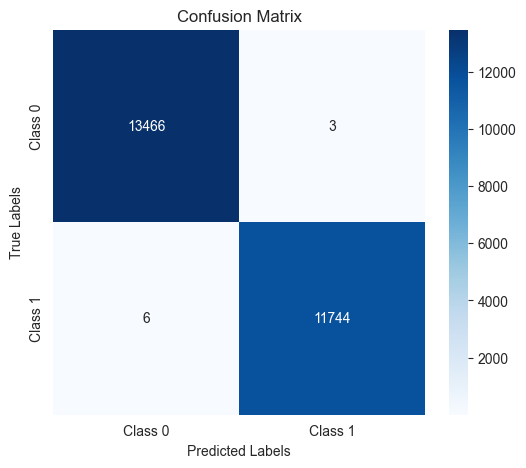

In [12]:
from sklearn.metrics import confusion_matrix


cmrf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cmrf, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [13]:
y_pred_df = pd.DataFrame(y_pred,index=y_test.index)
y_pred_df.isna().sum()

0    0
dtype: int64

In [14]:
combined_pred = pd.concat([y_test,y_pred_df],axis=1)
combined_pred.columns = ['is_attack','is_attack_pred']
predicted_probabilities = rf.predict_proba(X_test)
combined_pred['predict_prob'] = predicted_probabilities[:, 1]
combined_pred.head()

,is_attack,is_attack_pred,predict_prob
18091,0,0,0.0
29741,0,0,0.0
76709,0,0,0.0
91928,0,0,0.0
39962,0,0,0.0


In [15]:
combined_pred_eq = combined_pred[combined_pred['is_attack'] == combined_pred['is_attack_pred']]
combined_pred_uneq = combined_pred[combined_pred['is_attack'] != combined_pred['is_attack_pred']]
combined_pred_uneq = combined_pred_uneq[combined_pred_uneq['is_attack'] == 1]
combined_pred = pd.concat([combined_pred_eq,combined_pred_uneq],axis=0)
combined_pred.shape

(25216, 3)

In [16]:
op = pd.merge(X_test,combined_pred[['is_attack','is_attack_pred']],left_index=True,right_index=True)
op = pd.merge(op,df[['attack','attack_category']],left_index=True,right_index=True)
op.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,is_attack,is_attack_pred,attack,attack_category
18091,-0.109310,2.223211,-1.176110,0.751252,-0.007738,-0.005282,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.810590,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,0.182970,2.168276,-0.637521,-0.632055,-0.374383,-0.374543,0.770831,-0.349280,-0.336057,0.736054,1.258277,1.066418,-0.438899,-0.479531,-0.288575,-0.639313,-0.624805,-0.387837,-0.376431,-0.657260,-0.540987,-0.251742,-0.242121,-0.503694,1.161659,-0.196052,-0.625486,-0.343015,-0.173356,-0.418804,1.304684,-0.292247,0,0,normal,normal
29741,-0.109310,-0.124696,-0.442321,0.751252,-0.007699,-0.002285,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,1.233669,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,-0.585910,-0.148039,-0.637521,-0.632055,-0.374383,-0.374543,0.770831,-0.349280,-0.374565,0.736054,1.258277,1.066418,-0.438899,-0.479531,-0.288575,-0.639313,-0.624805,-0.387837,-0.376431,0.654638,-0.540987,-0.251742,-0.242121,-0.503694,-0.099836,-0.196052,-0.625486,-0.343015,-0.173356,-0.418804,1.304684,-0.292247,0,0,normal,normal
76709,-0.109310,2.223211,-1.176110,0.751252,-0.007741,-0.005290,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.810590,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,-0.725707,-0.368641,-0.637521,-0.632055,-0.374383,-0.374543,0.770831,-0.349280,-0.374565,-1.378981,0.734386,1.066418,-0.438899,2.765688,-0.199837,-0.639313,-0.624805,-0.387837,-0.376431,0.654638,-0.540987,-0.251742,-0.242121,-0.503694,-0.329199,-0.196052,-0.625486,-0.343015,-0.173356,-0.418804,0.800655,-0.292247,0,0,normal,normal
91928,-0.109310,2.223211,1.086406,0.751252,-0.007729,-0.005277,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.810590,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,-0.673283,-0.368641,-0.637521,-0.632055,-0.374383,-0.374543,-1.185430,1.260395,-0.374565,0.736054,1.204081,1.021860,-0.385959,-0.479531,-0.288575,-0.639313,-0.624805,-0.387837,-0.376431,-0.657260,-0.540987,-0.251742,-0.242121,-0.503694,-0.329485,-0.155959,-0.625486,-0.343015,-0.173356,-0.418804,1.209266,0.212254,0,0,normal,normal
39962,-0.098889,2.223211,-1.176110,0.751252,-0.007741,-0.005303,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.810590,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,-0.708232,-0.313490,-0.637521,-0.632055,-0.374383,-0.374543,-0.753233,3.369625,1.165770,-1.207764,-0.755994,-0.002991,-0.174195,-0.414627,-0.288575,-0.639313,-0.624805,-0.387837,-0.376431,0.654638,-0.540987,-0.251742,-0.242121,-0.503694,-0.329342,-0.156354,-0.625486,-0.343015,-0.173356,-0.418804,-0.766701,0.031930,0,0,normal,normal


In [17]:
attacks = op[np.logical_or(op['is_attack_pred'] == 1,np.logical_or(op['is_attack_pred'] == 1,op['is_attack'] == 1))].copy()
attacks.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,is_attack,is_attack_pred,attack,attack_category
25445,-0.10931,-0.124696,1.086406,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,1.100384,-0.327278,1.601975,1.604940,-0.374383,-0.374543,-1.458396,-0.016244,-0.374565,0.736054,-1.008907,-1.116959,-0.068313,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,0.654638,1.861644,-0.251742,-0.242121,0.157630,-0.283326,0.052797,1.655712,-0.343015,-0.173356,-0.020284,-0.910610,-0.235516,1,1,neptune,dos
71233,-0.10931,-0.124696,1.453300,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,1.275129,-0.299703,1.601975,1.604940,-0.374383,-0.374543,-1.435649,-0.016244,-0.374565,0.736054,-0.873418,-1.005562,-0.121254,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,0.217339,2.090466,-0.251742,-0.242121,0.488292,-0.244621,0.076497,1.655712,-0.343015,-0.173356,1.474165,-0.899748,-0.061271,1,1,neptune,dos
30788,-0.10931,-0.124696,1.086406,-2.222691,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,1.187757,-0.313490,-0.637521,-0.632055,2.746133,2.713628,-1.458396,0.039262,-0.374565,0.736054,-0.999874,-1.116959,-0.068313,-0.479531,-0.288575,-0.639313,-0.624805,2.873477,2.754328,0.654638,-0.540987,3.211260,1.514881,-0.503694,-0.280459,0.108097,-0.625486,3.321361,0.002502,-0.418804,-0.910436,-0.221333,1,1,neptune,dos
30951,-0.10931,-0.124696,1.086406,-2.222691,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,0.174233,-0.368641,-0.637521,-0.632055,2.746133,2.713628,-1.481144,0.150274,-0.374565,0.736054,-1.036005,-1.161518,0.037568,-0.479531,-0.288575,-0.639313,-0.624805,2.873477,2.754328,0.654638,-0.540987,1.385313,0.109279,-0.503694,-0.328625,-0.011192,-0.625486,3.321361,-0.138184,-0.418804,-0.911305,-0.274012,1,1,neptune,dos
111798,-0.10931,-0.124696,1.086406,-2.222691,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,0.934376,-0.285915,-0.637521,-0.632055,2.746133,2.713628,-1.412902,0.039262,-0.374565,0.736054,-0.981809,-1.094680,-0.015372,-0.479531,-0.288575,-0.639313,-0.624805,2.873477,2.754328,0.654638,-0.540987,2.754773,2.217682,-0.503694,-0.234013,0.068005,-0.625486,3.321361,0.072845,-0.418804,-0.909480,-0.178785,1,1,neptune,dos


In [18]:
augmented_train = X_train[X_train.index.isin(y_train[y_train==1].index)]
augmented_output = df[df.index.isin(y_train[y_train==1].index)]['attack']
augmented_attack = pd.merge(augmented_train,augmented_output,left_index=True,right_index=True)
augmented_attack.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,attack
76074,-0.10931,-0.124696,0.536064,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,1.790629,-0.175614,1.601975,1.604940,-0.374383,-0.374543,-1.390155,-0.016244,-0.374565,0.736054,-0.909548,-1.027842,-0.121254,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,0.654638,2.765491,-0.251742,-0.242121,1.976270,-0.136391,0.146412,1.655712,-0.343015,-0.173356,1.075645,-0.903484,-0.109897,neptune
116621,-0.10931,-0.124696,1.086406,-2.222691,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,0.252868,-0.285915,-0.637521,-0.632055,2.746133,2.713628,-1.367408,0.094768,-0.374565,0.736054,-0.981809,-1.094680,0.037568,-0.479531,-0.288575,-0.639313,-0.624805,2.873477,2.754328,0.654638,-0.540987,1.526982,2.217682,-0.503694,-0.246341,-0.017512,-0.625486,3.321361,0.072845,-0.418804,-0.909480,-0.164602,neptune
71284,-0.10931,-0.124696,1.086406,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,0.016962,-0.368641,1.601975,1.604940,-0.374383,-0.374543,-1.481144,0.094768,-0.374565,0.736054,-0.909548,-1.027842,-0.121254,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,0.217339,0.442948,-0.251742,-0.242121,-0.338363,-0.331206,-0.060172,1.655712,-0.343015,-0.173356,1.075645,-0.903484,-0.109897,neptune
74957,-0.10931,-0.124696,0.169170,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,0.418877,-0.230765,1.601975,1.604940,-0.374383,-0.374543,-1.321913,-0.071750,-0.374565,0.736054,-0.945679,-1.072400,-0.174195,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,0.654638,0.969238,-0.251742,-0.242121,1.314946,-0.192155,-0.065702,1.655712,-0.343015,-0.173356,0.677125,-0.907482,-0.180811,neptune
102313,-0.10931,-0.124696,1.759045,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,-0.620859,-0.272127,1.601975,1.604940,-0.374383,-0.374543,-0.093563,0.483310,-0.374565,0.736054,-0.503081,-0.626813,-0.333018,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,-0.657260,-0.392253,-0.251742,-0.242121,0.818954,-0.227992,-0.157539,1.655712,-0.343015,-0.173356,5.558992,-0.786167,-0.049114,neptune


In [19]:
augmented_attack = pd.merge(augmented_attack,df['attack_category'],left_index=True,right_index=True)
augmented_attack.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,attack,attack_category
76074,-0.10931,-0.124696,0.536064,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,1.790629,-0.175614,1.601975,1.604940,-0.374383,-0.374543,-1.390155,-0.016244,-0.374565,0.736054,-0.909548,-1.027842,-0.121254,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,0.654638,2.765491,-0.251742,-0.242121,1.976270,-0.136391,0.146412,1.655712,-0.343015,-0.173356,1.075645,-0.903484,-0.109897,neptune,dos
116621,-0.10931,-0.124696,1.086406,-2.222691,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,0.252868,-0.285915,-0.637521,-0.632055,2.746133,2.713628,-1.367408,0.094768,-0.374565,0.736054,-0.981809,-1.094680,0.037568,-0.479531,-0.288575,-0.639313,-0.624805,2.873477,2.754328,0.654638,-0.540987,1.526982,2.217682,-0.503694,-0.246341,-0.017512,-0.625486,3.321361,0.072845,-0.418804,-0.909480,-0.164602,neptune,dos
71284,-0.10931,-0.124696,1.086406,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,0.016962,-0.368641,1.601975,1.604940,-0.374383,-0.374543,-1.481144,0.094768,-0.374565,0.736054,-0.909548,-1.027842,-0.121254,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,0.217339,0.442948,-0.251742,-0.242121,-0.338363,-0.331206,-0.060172,1.655712,-0.343015,-0.173356,1.075645,-0.903484,-0.109897,neptune,dos
74957,-0.10931,-0.124696,0.169170,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,0.418877,-0.230765,1.601975,1.604940,-0.374383,-0.374543,-1.321913,-0.071750,-0.374565,0.736054,-0.945679,-1.072400,-0.174195,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,0.654638,0.969238,-0.251742,-0.242121,1.314946,-0.192155,-0.065702,1.655712,-0.343015,-0.173356,0.677125,-0.907482,-0.180811,neptune,dos
102313,-0.10931,-0.124696,1.759045,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,-0.620859,-0.272127,1.601975,1.604940,-0.374383,-0.374543,-0.093563,0.483310,-0.374565,0.736054,-0.503081,-0.626813,-0.333018,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,-0.657260,-0.392253,-0.251742,-0.242121,0.818954,-0.227992,-0.157539,1.655712,-0.343015,-0.173356,5.558992,-0.786167,-0.049114,neptune,dos


In [20]:
tst = attacks.drop(['is_attack_pred','is_attack'],axis=1)

In [21]:
tst = pd.concat([tst,augmented_attack],axis=0)
tst.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,attack,attack_category
25445,-0.10931,-0.124696,1.086406,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,1.100384,-0.327278,1.601975,1.604940,-0.374383,-0.374543,-1.458396,-0.016244,-0.374565,0.736054,-1.008907,-1.116959,-0.068313,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,0.654638,1.861644,-0.251742,-0.242121,0.157630,-0.283326,0.052797,1.655712,-0.343015,-0.173356,-0.020284,-0.910610,-0.235516,neptune,dos
71233,-0.10931,-0.124696,1.453300,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,1.275129,-0.299703,1.601975,1.604940,-0.374383,-0.374543,-1.435649,-0.016244,-0.374565,0.736054,-0.873418,-1.005562,-0.121254,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,0.217339,2.090466,-0.251742,-0.242121,0.488292,-0.244621,0.076497,1.655712,-0.343015,-0.173356,1.474165,-0.899748,-0.061271,neptune,dos
30788,-0.10931,-0.124696,1.086406,-2.222691,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,1.187757,-0.313490,-0.637521,-0.632055,2.746133,2.713628,-1.458396,0.039262,-0.374565,0.736054,-0.999874,-1.116959,-0.068313,-0.479531,-0.288575,-0.639313,-0.624805,2.873477,2.754328,0.654638,-0.540987,3.211260,1.514881,-0.503694,-0.280459,0.108097,-0.625486,3.321361,0.002502,-0.418804,-0.910436,-0.221333,neptune,dos
30951,-0.10931,-0.124696,1.086406,-2.222691,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,0.174233,-0.368641,-0.637521,-0.632055,2.746133,2.713628,-1.481144,0.150274,-0.374565,0.736054,-1.036005,-1.161518,0.037568,-0.479531,-0.288575,-0.639313,-0.624805,2.873477,2.754328,0.654638,-0.540987,1.385313,0.109279,-0.503694,-0.328625,-0.011192,-0.625486,3.321361,-0.138184,-0.418804,-0.911305,-0.274012,neptune,dos
111798,-0.10931,-0.124696,1.086406,-2.222691,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,0.934376,-0.285915,-0.637521,-0.632055,2.746133,2.713628,-1.412902,0.039262,-0.374565,0.736054,-0.981809,-1.094680,-0.015372,-0.479531,-0.288575,-0.639313,-0.624805,2.873477,2.754328,0.654638,-0.540987,2.754773,2.217682,-0.503694,-0.234013,0.068005,-0.625486,3.321361,0.072845,-0.418804,-0.909480,-0.178785,neptune,dos


In [22]:
all_attacks1 = tst['attack'].unique()

# Step 2: Create a stratified split ensuring that each category is in the test set at least once
train1_data = pd.DataFrame()
test1_data = pd.DataFrame()

# Split the data by each attack category and ensure they appear in test
for category in all_attacks1:
    # Get data for the current category
    category_data = tst[tst['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) > 30:
        category_train, category_test = train_test_split(category_data, test_size=0.2,random_state=42)
    elif len(category_data) == 1:
        test1_data = pd.concat([test1_data,category_data])
        noise_data = category_data.copy()
        noise_data['count'] += 0.0001
        #display(category_data)
        #display(noise_data)
        train1_data = pd.concat([train1_data,noise_data],axis=0)
        # print(train1_data[train1_data['attack'] == category].shape)
        continue
    elif len(category_data) > 1 and len(category_data) <= 5:
        #print('noise to',category)
        all_idx = category_data.index
        chooser = np.random.choice(all_idx,1)
        test_selection = category_data[~category_data.index.isin(chooser)]
        train_selection = category_data[category_data.index.isin(chooser)]

        test1_data = pd.concat([test1_data,test_selection])
        train1_data = pd.concat([train1_data,train_selection])

        noise_data = train_selection.copy()
        noise_data['count'] += 0.0001
        train1_data = pd.concat([train1_data,noise_data],axis=0)
        continue
    
    elif len(category_data) > 5 and len(category_data) <= 10:
        #print('noise to',category)
        all_idx = category_data.index
        chooser = np.random.choice(all_idx,3)
        test_selection = category_data[category_data.index.isin(chooser)]
        train_selection = category_data[~category_data.index.isin(chooser)]

        test1_data = pd.concat([test1_data,test_selection])
        train1_data = pd.concat([train1_data,train_selection])
        continue
    

    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    train1_data = pd.concat([train1_data,category_train])
    test1_data = pd.concat([test1_data,category_test])

In [23]:
train1_data.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,attack,attack_category
119182,-0.10931,-0.124696,1.086406,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,1.869264,-0.106676,1.601975,1.60494,-0.374383,-0.374543,-1.344660,-0.016244,-0.374565,0.736054,-1.017940,-1.139238,-0.015372,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,0.654638,2.868461,-0.251742,-0.242121,2.802925,-0.044502,0.157077,1.655712,-0.343015,-0.173356,-0.119914,-0.911045,-0.243621,neptune,dos
21767,-0.10931,-0.124696,0.474915,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,1.074172,-0.327278,1.601975,1.60494,-0.374383,-0.374543,-1.458396,0.039262,-0.374565,0.736054,-0.900516,-1.027842,-0.174195,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,-0.657260,1.827321,-0.251742,-0.242121,0.157630,-0.284186,0.090125,1.655712,-0.343015,-0.173356,1.175275,-0.902963,-0.130159,neptune,dos
7584,-0.10931,-0.124696,1.086406,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,1.266392,-0.189402,1.601975,1.60494,-0.374383,-0.374543,-1.367408,-0.016244,-0.374565,0.736054,-0.927614,-1.050121,-0.068313,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,0.654638,2.079025,-0.251742,-0.242121,1.810939,-0.146569,0.075312,1.655712,-0.343015,-0.173356,0.876385,-0.905657,-0.107871,neptune,dos
93134,-0.10931,-0.124696,0.230319,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,1.379977,-0.230765,1.601975,1.60494,-0.374383,-0.374543,-1.390155,-0.071750,-0.374565,0.736054,-0.945679,-1.072400,-0.174195,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,0.217339,2.227759,-0.251742,-0.242121,1.314946,-0.170078,0.042923,1.655712,-0.343015,-0.173356,0.677125,-0.907482,-0.180811,neptune,dos
4252,-0.10931,-0.124696,1.086406,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,1.161545,-0.161827,1.601975,1.60494,-0.374383,-0.374543,-1.344660,-0.016244,-0.374565,0.736054,-0.873418,-1.005562,-0.174195,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,0.654638,1.941732,-0.251742,-0.242121,2.141601,-0.125783,0.061092,1.655712,-0.343015,-0.173356,1.474165,-0.899748,-0.099767,neptune,dos


In [24]:
X1_train = train1_data.drop(['attack','attack_category'],axis=1)
y1_train = train1_data['attack_category']
X1_test = test1_data.drop(['attack','attack_category'],axis=1)
y1_test = test1_data['attack_category']

In [25]:
target_encoder = LabelEncoder()
y1_train_encoded = target_encoder.fit_transform(y1_train)
y1_test_encoded = target_encoder.transform(y1_test)
target_classes = [target_encoder.classes_[i] for i in range(len(target_encoder.classes_))]

In [26]:
rf2 = RandomForestClassifier(random_state=42,class_weight='balanced',
                             n_estimators= 200,
                            min_samples_split=2,
                            max_features='log2',
                            max_depth=None)
rf2.fit(X1_train,y1_train_encoded)
y_pred1 = rf2.predict(X1_test)

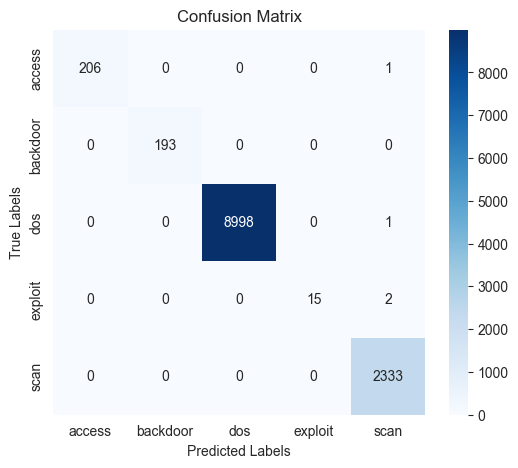

In [27]:
cm1 = confusion_matrix(y1_test_encoded, y_pred1)

plt.figure(figsize=(6, 5))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=target_classes, yticklabels=target_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y1_test_encoded, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      1.00      1.00       193
           2       1.00      1.00      1.00      8999
           3       1.00      0.88      0.94        17
           4       1.00      1.00      1.00      2333

    accuracy                           1.00     11749
   macro avg       1.00      0.98      0.99     11749
weighted avg       1.00      1.00      1.00     11749



In [29]:
y1_pred_df = pd.DataFrame(y_pred1,index=y1_test.index)
y1_pred_df.isna().sum()

0    0
dtype: int64

In [30]:
combined_pred1 = pd.concat([y1_test,y1_pred_df],axis=1)
combined_pred1.columns = ['attack_category','attack_category_pred']
predicted_probabilities1 = rf2.predict_proba(X1_test)
combined_pred1['predict_prob'] = predicted_probabilities1[:, 1]

In [31]:
ocategory = dict()
for i in range(len(target_encoder.classes_)):
    ocategory[i] = target_encoder.classes_[i]
ocategory

{0: 'access', 1: 'backdoor', 2: 'dos', 3: 'exploit', 4: 'scan'}

In [32]:
combined_pred1['attack_category_pred'] = combined_pred1['attack_category_pred'].map(ocategory)

In [33]:
combined_pred1[combined_pred1['attack_category_pred'] != combined_pred1['attack_category']]

,attack_category,attack_category_pred,predict_prob
83805,access,scan,0.005
105855,dos,scan,0.000
91937,exploit,scan,0.015
120498,exploit,scan,0.015


In [34]:
op1 = pd.merge(X1_test,combined_pred1,left_index=True,right_index=True)
op1 = pd.merge(op1,df['attack'],left_index=True,right_index=True)
op1.drop(['attack_category_pred','predict_prob'],axis=1,inplace=True)
op1.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,attack_category,attack
62040,-0.10931,-0.124696,1.086406,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,0.383927,-0.148039,1.601975,1.604940,-0.374383,-0.374543,-1.208177,-0.016244,-0.374565,0.564837,-0.891483,-1.005562,-0.068313,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,-0.657260,0.923474,-0.251742,-0.242121,2.306932,-0.104997,-0.044372,1.503632,-0.343015,-0.173356,1.274905,-0.900964,-0.051140,dos,neptune
79487,-0.10931,-0.124696,1.759045,-1.850948,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,1.082909,-0.368641,-0.637521,-0.632055,2.746133,2.713628,-1.503891,0.039262,-0.374565,0.736054,-1.036005,-1.161518,-0.015372,-0.479531,-0.288575,-0.639313,-0.624805,2.873477,2.754328,0.217339,-0.540987,3.022369,0.109279,-0.503694,-0.343534,0.091507,-0.625486,3.321361,-0.138184,-0.418804,-0.911305,-0.276038,dos,neptune
77865,-0.10931,-0.124696,0.536064,-2.222691,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,0.235394,-0.258340,-0.637521,-0.632055,2.746133,2.713628,-1.321913,0.039262,-0.374565,0.736054,-0.963744,-1.072400,-0.068313,-0.479531,-0.288575,-0.639313,-0.624805,2.873477,2.754328,0.217339,-0.540987,1.495500,2.920482,-0.503694,-0.216238,-0.042595,-0.625486,3.321361,0.143188,-0.418804,-0.908177,-0.164602,dos,neptune
42819,-0.10931,-0.124696,2.248238,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,0.305292,-0.272127,1.601975,1.604940,-0.374383,-0.374543,-1.344660,-0.016244,-0.374565,0.736054,-0.972777,-1.094680,-0.174195,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,-0.219960,0.820504,-0.251742,-0.242121,0.818954,-0.224122,-0.055037,1.655712,-0.343015,-0.173356,0.378236,-0.909220,-0.211203,dos,neptune
101160,-0.10931,-0.124696,1.086406,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,1.266392,-0.203189,1.601975,1.604940,-0.374383,-0.374543,-1.367408,-0.071750,-0.374565,0.051185,-0.927614,-1.005562,-0.121254,-0.447079,-0.288575,1.586578,1.618961,-0.387837,-0.376431,-0.657260,2.079025,-0.251742,-0.242121,1.645608,-0.146569,0.030085,1.030663,-0.343015,-0.173356,0.876385,-0.903397,-0.134211,dos,neptune


In [35]:
augmented_train1 = X1_train.copy()
augmented_output1 = df[df.index.isin(augmented_train1.index)][['attack_category','attack']]
augmented_attack1 = pd.merge(augmented_train1,augmented_output1,left_index=True,right_index=True)
augmented_attack1.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,attack_category,attack
119182,-0.10931,-0.124696,1.086406,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,1.869264,-0.106676,1.601975,1.60494,-0.374383,-0.374543,-1.344660,-0.016244,-0.374565,0.736054,-1.017940,-1.139238,-0.015372,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,0.654638,2.868461,-0.251742,-0.242121,2.802925,-0.044502,0.157077,1.655712,-0.343015,-0.173356,-0.119914,-0.911045,-0.243621,dos,neptune
21767,-0.10931,-0.124696,0.474915,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,1.074172,-0.327278,1.601975,1.60494,-0.374383,-0.374543,-1.458396,0.039262,-0.374565,0.736054,-0.900516,-1.027842,-0.174195,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,-0.657260,1.827321,-0.251742,-0.242121,0.157630,-0.284186,0.090125,1.655712,-0.343015,-0.173356,1.175275,-0.902963,-0.130159,dos,neptune
7584,-0.10931,-0.124696,1.086406,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,1.266392,-0.189402,1.601975,1.60494,-0.374383,-0.374543,-1.367408,-0.016244,-0.374565,0.736054,-0.927614,-1.050121,-0.068313,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,0.654638,2.079025,-0.251742,-0.242121,1.810939,-0.146569,0.075312,1.655712,-0.343015,-0.173356,0.876385,-0.905657,-0.107871,dos,neptune
93134,-0.10931,-0.124696,0.230319,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,1.379977,-0.230765,1.601975,1.60494,-0.374383,-0.374543,-1.390155,-0.071750,-0.374565,0.736054,-0.945679,-1.072400,-0.174195,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,0.217339,2.227759,-0.251742,-0.242121,1.314946,-0.170078,0.042923,1.655712,-0.343015,-0.173356,0.677125,-0.907482,-0.180811,dos,neptune
4252,-0.10931,-0.124696,1.086406,-0.735719,-0.007746,-0.00531,-0.013734,-0.091208,-0.007426,-0.095649,-0.026347,-0.81059,-0.021129,-0.036493,-0.025575,-0.021312,-0.026201,-0.017925,-0.040271,0.0,-0.00315,-0.097771,1.161545,-0.161827,1.601975,1.60494,-0.374383,-0.374543,-1.344660,-0.016244,-0.374565,0.736054,-0.873418,-1.005562,-0.174195,-0.479531,-0.288575,1.609062,1.618961,-0.387837,-0.376431,0.654638,1.941732,-0.251742,-0.242121,2.141601,-0.125783,0.061092,1.655712,-0.343015,-0.173356,1.474165,-0.899748,-0.099767,dos,neptune


In [36]:
final = pd.concat([augmented_attack1,op1],axis=0)
final.shape

(58633, 56)

In [37]:
dos_data = final[final['attack_category'] == 'dos'].copy()
dos_data.drop('attack_category',axis=1,inplace=True)

scan_data = final[final['attack_category'] == 'scan'].copy()
scan_data.drop('attack_category',axis=1,inplace=True)

backdoor_data = final[final['attack_category'] == 'backdoor'].copy()
backdoor_data.drop('attack_category',axis=1,inplace=True)

access_data = final[final['attack_category'] == 'access'].copy()
access_data.drop('attack_category',axis=1,inplace=True)

exploit_data = final[final['attack_category'] == 'exploit'].copy()
exploit_data.drop('attack_category',axis=1,inplace=True)

In [38]:
dos_train = pd.DataFrame()
dos_test = pd.DataFrame()

for category in dos_data['attack'].unique():
    # Get data for the current category
    category_data = dos_data[dos_data['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) == 1:
        dos_train = pd.concat([dos_train,category_data])
        continue
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    dos_train = pd.concat([dos_train,category_train])
    dos_test = pd.concat([dos_test,category_test])

dosxtrain = dos_train.drop(['attack'],axis=1)
dosytrain = dos_train['attack']
dosxtest = dos_test.drop(['attack'],axis=1)
dosytest = dos_test['attack']

In [39]:
scan_train = pd.DataFrame()
scan_test = pd.DataFrame()

for category in scan_data['attack'].unique():
    # Get data for the current category
    category_data = scan_data[scan_data['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) == 1:
        scan_train = pd.concat([scan_train,category_data])
        continue
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    scan_train = pd.concat([scan_train,category_train])
    scan_test = pd.concat([scan_test,category_test])

scanxtrain = scan_train.drop(['attack'],axis=1)
scanytrain = scan_train['attack']
scanxtest = scan_test.drop(['attack'],axis=1)
scanytest = scan_test['attack']

In [40]:
access_train = pd.DataFrame()
access_test = pd.DataFrame()

for category in access_data['attack'].unique():
    # Get data for the current category
    category_data = access_data[access_data['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) == 1:
        access_train = pd.concat([access_train,category_data])
        continue
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    access_train = pd.concat([access_train,category_train])
    access_test = pd.concat([access_test,category_test])

accessxtrain = access_train.drop(['attack'],axis=1)
accessytrain = access_train['attack']
accessxtest = access_test.drop(['attack'],axis=1)
accessytest = access_test['attack']

In [41]:
backdoor_train = pd.DataFrame()
backdoor_test = pd.DataFrame()

for category in backdoor_data['attack'].unique():
    # Get data for the current category
    category_data = backdoor_data[backdoor_data['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) == 1:
        backdoor_train = pd.concat([backdoor_train,category_data])
        continue
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    backdoor_train = pd.concat([backdoor_train,category_train])
    backdoor_test = pd.concat([backdoor_test,category_test])

backdoorxtrain = backdoor_train.drop(['attack'],axis=1)
backdoorytrain = backdoor_train['attack']
backdoorxtest = backdoor_test.drop(['attack'],axis=1)
backdoorytest = backdoor_test['attack']

In [42]:
exploit_train = pd.DataFrame()
exploit_test = pd.DataFrame()

for category in exploit_data['attack'].unique():
    # Get data for the current category
    category_data = exploit_data[exploit_data['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) == 1:
        exploit_train = pd.concat([exploit_train,category_data])
        continue
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    exploit_train = pd.concat([exploit_train,category_train])
    exploit_test = pd.concat([exploit_test,category_test])

exploitxtrain = exploit_train.drop(['attack'],axis=1)
exploitytrain = exploit_train['attack']
exploitxtest = exploit_test.drop(['attack'],axis=1)
exploitytest = exploit_test['attack']

In [43]:
dos_encoder = LabelEncoder()
dosytrain = dos_encoder.fit_transform(dosytrain)
dosytest = dos_encoder.transform(dosytest)

scan_encoder = LabelEncoder()
scanytrain = scan_encoder.fit_transform(scanytrain)
scanytest = scan_encoder.transform(scanytest)

access_encoder = LabelEncoder()
accessytrain = access_encoder.fit_transform(accessytrain)
accessytest = access_encoder.transform(accessytest)

backdoor_encoder = LabelEncoder()
backytrain = backdoor_encoder.fit_transform(backdoorytrain)
backytest = backdoor_encoder.transform(backdoorytest)

exploit_encoder = LabelEncoder()
exploitytrain= exploit_encoder.fit_transform(exploitytrain)
exploitytest = exploit_encoder.transform(exploitytest)

In [44]:
rfdos = RandomForestClassifier(class_weight='balanced',random_state=42)
rfdos.fit(dosxtrain, dosytrain)
y_pred_dos= rfdos.predict(dosxtest)

rfscan = RandomForestClassifier(class_weight='balanced',random_state=42)
rfscan.fit(scanxtrain, scanytrain)
y_pred_scan= rfscan.predict(scanxtest)

rfback = RandomForestClassifier(class_weight='balanced',random_state=42)
rfback.fit(backdoorxtrain, backdoorytrain)
y_pred_back = rfback.predict(backdoorxtest)

rfaccess = RandomForestClassifier(class_weight='balanced',random_state=42)
rfaccess.fit(accessxtrain, accessytrain)
y_pred_access= rfaccess.predict(accessxtest)

rfexploit = RandomForestClassifier(class_weight='balanced',random_state=42)
rfexploit.fit(exploitxtrain, exploitytrain)
y_pred_exploit = rfexploit.predict(exploitxtest)

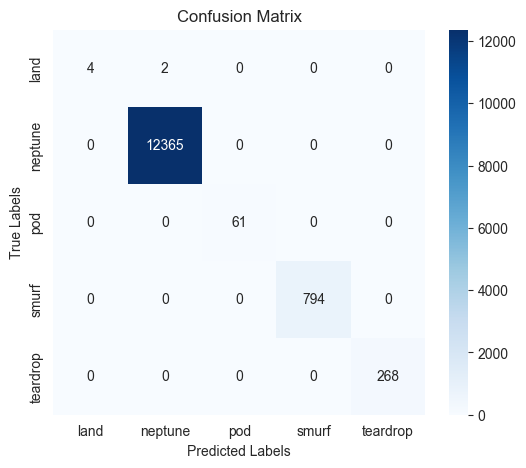

In [45]:
cmdos = confusion_matrix(dosytest, y_pred_dos)
dos_labels = [dos_encoder.classes_[i] for i in range(len(np.unique(dosytest)))]

plt.figure(figsize=(6, 5))
sns.heatmap(cmdos, annot=True, fmt='d', cmap='Blues',xticklabels=dos_labels, yticklabels=dos_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [46]:
print(classification_report(dosytest, y_pred_dos,target_names=dos_labels))

              precision    recall  f1-score   support

        land       1.00      0.67      0.80         6
     neptune       1.00      1.00      1.00     12365
         pod       1.00      1.00      1.00        61
       smurf       1.00      1.00      1.00       794
    teardrop       1.00      1.00      1.00       268

    accuracy                           1.00     13494
   macro avg       1.00      0.93      0.96     13494
weighted avg       1.00      1.00      1.00     13494



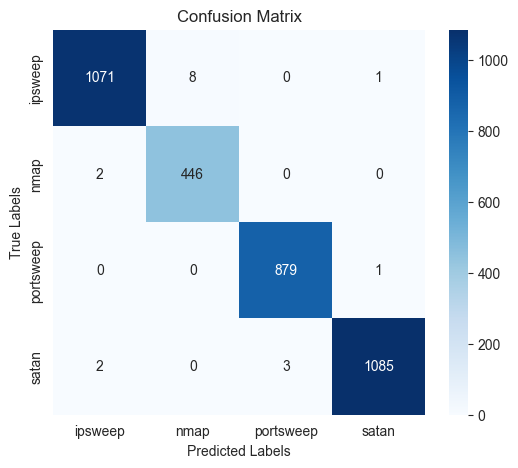

In [47]:
cmscan = confusion_matrix(scanytest, y_pred_scan)
scan_labels = [scan_encoder.classes_[i] for i in range(len(np.unique(scanytest)))]

plt.figure(figsize=(6, 5))
sns.heatmap(cmscan, annot=True, fmt='d', cmap='Blues',xticklabels=scan_labels, yticklabels=scan_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [48]:
print(classification_report(scanytest, y_pred_scan,target_names=scan_labels))

              precision    recall  f1-score   support

     ipsweep       1.00      0.99      0.99      1080
        nmap       0.98      1.00      0.99       448
   portsweep       1.00      1.00      1.00       880
       satan       1.00      1.00      1.00      1090

    accuracy                           1.00      3498
   macro avg       0.99      1.00      0.99      3498
weighted avg       1.00      1.00      1.00      3498



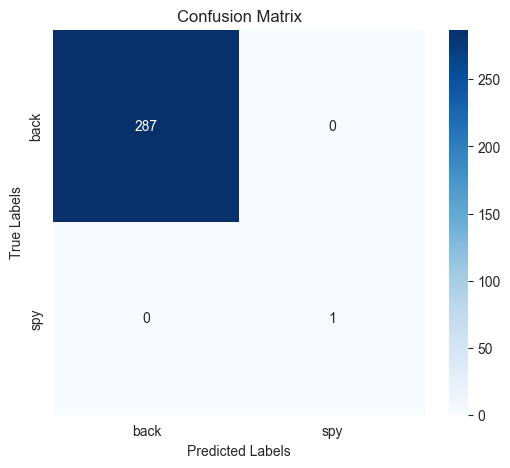

In [49]:
cmsback = confusion_matrix(backdoorytest, y_pred_back)
back_labels = [backdoor_encoder.classes_[i] for i in range(len(np.unique(backdoorytest)))]

plt.figure(figsize=(6, 5))
sns.heatmap(cmsback, annot=True, fmt='d', cmap='Blues',xticklabels=back_labels, yticklabels=back_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [50]:
print(classification_report(backdoorytest, y_pred_back,target_names=back_labels))

              precision    recall  f1-score   support

        back       1.00      1.00      1.00       287
         spy       1.00      1.00      1.00         1

    accuracy                           1.00       288
   macro avg       1.00      1.00      1.00       288
weighted avg       1.00      1.00      1.00       288



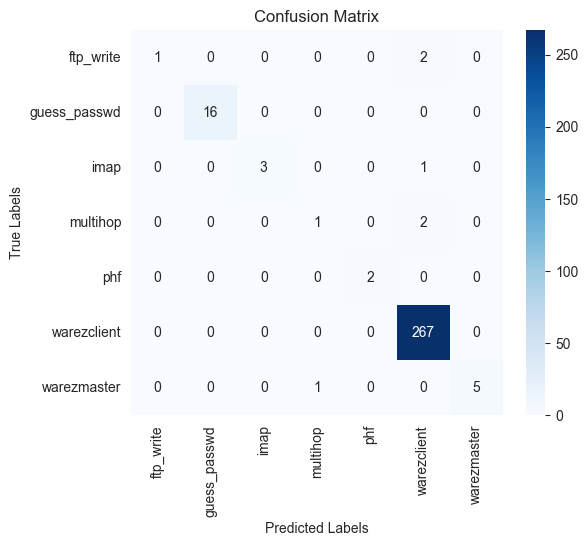

In [51]:
cmaccess = confusion_matrix(accessytest, y_pred_access)
access_labels = [access_encoder.classes_[i] for i in range(len(np.unique(accessytest)))]

plt.figure(figsize=(6, 5))
sns.heatmap(cmaccess, annot=True, fmt='d', cmap='Blues',xticklabels=access_labels,yticklabels=access_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [52]:
print(classification_report(accessytest, y_pred_access,target_names=access_labels))

              precision    recall  f1-score   support

   ftp_write       1.00      0.33      0.50         3
guess_passwd       1.00      1.00      1.00        16
        imap       1.00      0.75      0.86         4
    multihop       0.50      0.33      0.40         3
         phf       1.00      1.00      1.00         2
 warezclient       0.98      1.00      0.99       267
 warezmaster       1.00      0.83      0.91         6

    accuracy                           0.98       301
   macro avg       0.93      0.75      0.81       301
weighted avg       0.98      0.98      0.98       301



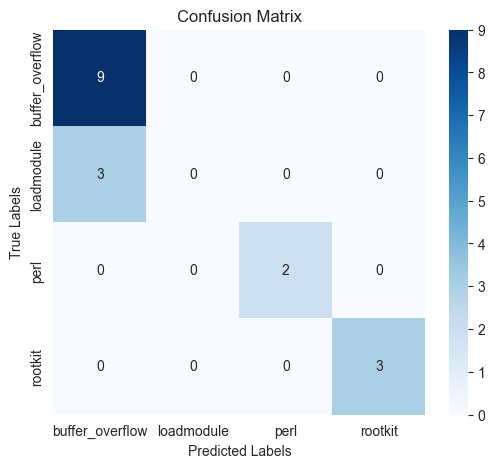

In [53]:
cmexploit = confusion_matrix(exploitytest, y_pred_exploit)
exploit_labels = [exploit_encoder.classes_[i] for i in range(len(np.unique(exploitytest)))]

plt.figure(figsize=(6, 5))
sns.heatmap(cmexploit, annot=True, fmt='d', cmap='Blues',xticklabels=exploit_labels,yticklabels=exploit_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [54]:
print(classification_report(exploitytest, y_pred_exploit,target_names=exploit_labels))

                 precision    recall  f1-score   support

buffer_overflow       0.75      1.00      0.86         9
     loadmodule       0.00      0.00      0.00         3
           perl       1.00      1.00      1.00         2
        rootkit       1.00      1.00      1.00         3

       accuracy                           0.82        17
      macro avg       0.69      0.75      0.71        17
   weighted avg       0.69      0.82      0.75        17



d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


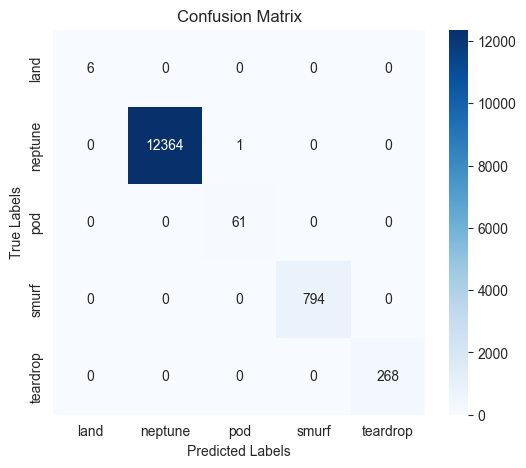

In [55]:
from sklearn.linear_model import LogisticRegression

logreg_dos = LogisticRegression(random_state=42,class_weight='balanced',
                                   multi_class='multinomial', solver='lbfgs',max_iter=1000)
logreg_dos.fit(dosxtrain,dosytrain)
y_pred_log_reg_dos = logreg_dos.predict(dosxtest)

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(dosytest,y_pred_log_reg_dos), annot=True, fmt='d', cmap='Blues',xticklabels=dos_labels, yticklabels=dos_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [56]:
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'saga'],   # Solvers to consider
    'max_iter': [100, 200, 300,400,500]    # Number of iterations for optimization
}

logreg_dos = LogisticRegression(random_state=42,class_weight='balanced',
                                   multi_class='multinomial', solver='lbfgs',max_iter=1000)

random_search_log_dos = RandomizedSearchCV(logreg_dos, param_distributions=param_dist, 
                                   n_iter=500, cv=5, scoring='accuracy', 
                                   n_jobs=-1, random_state=42)
random_search_log_dos.fit(dosxtrain, dosytrain)
random_search_log_dos.best_params_

d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 50 is smaller than n_iter=500. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


{'solver': 'lbfgs', 'max_iter': 100, 'C': 0.01}

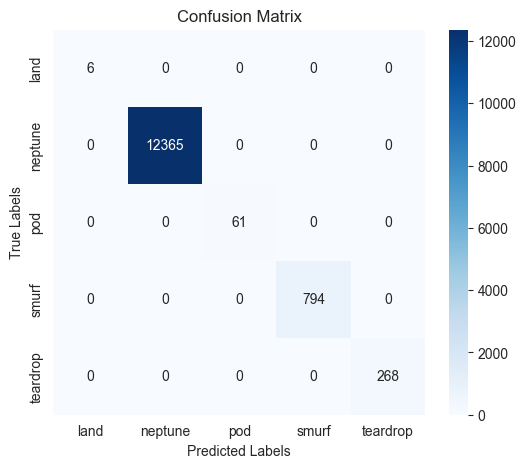

In [82]:
best_log_dos = random_search_log_dos.best_estimator_
y_pred_log_dos = best_log_dos.predict(dosxtest)


cmdoslog = confusion_matrix(dosytest, y_pred_log_dos)
plt.figure(figsize=(6, 5))
sns.heatmap(cmdoslog, annot=True, fmt='d', cmap='Blues',xticklabels=dos_labels, yticklabels=dos_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [58]:
print(classification_report(dosytest, y_pred_log_dos,target_names=dos_labels))

              precision    recall  f1-score   support

        land       1.00      1.00      1.00         6
     neptune       1.00      1.00      1.00     12365
         pod       1.00      1.00      1.00        61
       smurf       1.00      1.00      1.00       794
    teardrop       1.00      1.00      1.00       268

    accuracy                           1.00     13494
   macro avg       1.00      1.00      1.00     13494
weighted avg       1.00      1.00      1.00     13494



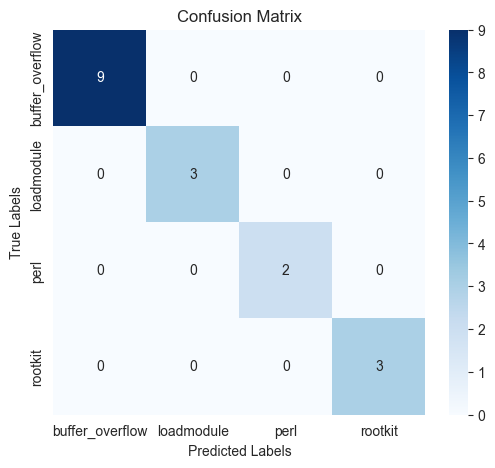

In [59]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

ros_dict_exp = dict()
smote_dict_exp = dict()

for i in range(len(exploit_data['attack'].unique())):
    data_shape = exploit_data[exploit_data['attack'] == exploit_labels[i]].shape[0]
    if data_shape < 10:
        ros_dict_exp[i] = 10
    smote_dict_exp[i] = 200


ros = RandomOverSampler(sampling_strategy=ros_dict_exp,random_state=42)
exp_xtrain_resampled, exp_ytrain_resampled = ros.fit_resample(exploitxtrain, exploitytrain)

smote = SMOTE(sampling_strategy=smote_dict_exp,random_state=42)
exp_xtrain_smote, exp_ytrain_smote = smote.fit_resample(exp_xtrain_resampled, exp_ytrain_resampled)

brfexp2 = RandomForestClassifier(random_state=42)
brfexp2.fit(exp_xtrain_smote, exp_ytrain_smote) 
y_pred_exp_brf2= brfexp2.predict(exploitxtest)

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(exploitytest,y_pred_exp_brf2), annot=True, fmt='d', cmap='Blues',xticklabels=exploit_labels,yticklabels=exploit_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [60]:
print(classification_report(exploitytest, y_pred_exp_brf2,target_names=exploit_labels))

                 precision    recall  f1-score   support

buffer_overflow       1.00      1.00      1.00         9
     loadmodule       1.00      1.00      1.00         3
           perl       1.00      1.00      1.00         2
        rootkit       1.00      1.00      1.00         3

       accuracy                           1.00        17
      macro avg       1.00      1.00      1.00        17
   weighted avg       1.00      1.00      1.00        17



C:\Users\Vamsi krishna\AppData\Local\Temp\ipykernel_9736\2236873267.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_access = access_data['attack'].replace(access_label_dict)


<Figure size 640x480 with 0 Axes>

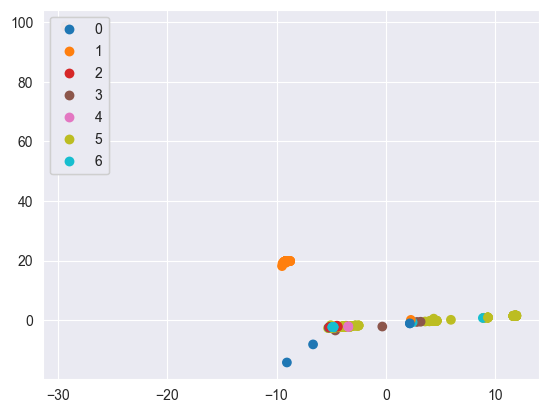

In [61]:
from sklearn.decomposition import PCA

access_label_dict = dict()
for i in range(len(access_labels)):
    access_label_dict[access_labels[i]] = i
access_label_dict

pca_access = PCA(n_components = 2)

X_access = access_data.drop('attack',axis=1)
y_access = access_data['attack'].replace(access_label_dict)

X_embedded_access = pca_access.fit_transform(X_access)

plt.set_cmap('tab10')

fig, ax = plt.subplots()
scatter = ax.scatter(X_embedded_access[:,0],X_embedded_access[:,1],c=y_access)

legend = ax.legend(*scatter.legend_elements(),loc="upper left")
ax.add_artist(legend)

plt.show()
plt.close()

In [62]:
access_label_dict

{'ftp_write': 0,
 'guess_passwd': 1,
 'imap': 2,
 'multihop': 3,
 'phf': 4,
 'warezclient': 5,
 'warezmaster': 6}

In [63]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

ros_dict_access = dict()
smote_dict_access = dict()

for i in range(len(access_data['attack'].unique())):
    data_shape = access_data[access_data['attack'] == access_labels[i]].shape[0]
    if data_shape < 10:
        ros_dict_access[i] = 10
    smote_dict_access[i] = 1000


ros_access = RandomOverSampler(sampling_strategy=ros_dict_access,random_state=42)
access_xtrain_resampled, access_ytrain_resampled = ros_access.fit_resample(accessxtrain, accessytrain)

smote_access = SMOTE(sampling_strategy=smote_dict_access,random_state=42)
access_xtrain_smote, access_ytrain_smote = smote_access.fit_resample(access_xtrain_resampled, access_ytrain_resampled)

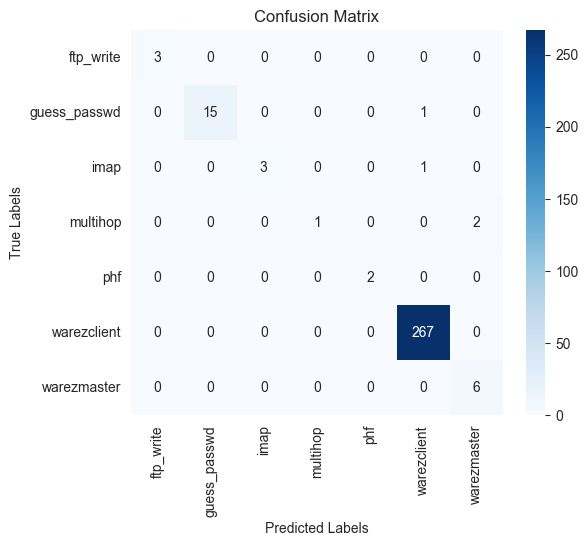

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,metric='manhattan',weights='distance')
knn.fit(access_xtrain_smote, access_ytrain_smote)
y_pred_knn = knn.predict(accessxtest)
cmknnmaccess = confusion_matrix(accessytest, y_pred_knn)

plt.figure(figsize=(6, 5))
sns.heatmap(cmknnmaccess, annot=True, fmt='d', cmap='Blues',xticklabels=access_labels,yticklabels=access_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [65]:
print(classification_report(accessytest, y_pred_knn,target_names=access_labels))

              precision    recall  f1-score   support

   ftp_write       1.00      1.00      1.00         3
guess_passwd       1.00      0.94      0.97        16
        imap       1.00      0.75      0.86         4
    multihop       1.00      0.33      0.50         3
         phf       1.00      1.00      1.00         2
 warezclient       0.99      1.00      1.00       267
 warezmaster       0.75      1.00      0.86         6

    accuracy                           0.99       301
   macro avg       0.96      0.86      0.88       301
weighted avg       0.99      0.99      0.99       301



In [83]:
scanlabel_dict = dict()
for i in range(len(scan_labels)):
    scanlabel_dict[scan_labels[i]] = i
scanlabel_dict

{'ipsweep': 0, 'nmap': 1, 'portsweep': 2, 'satan': 3}

C:\Users\Vamsi krishna\AppData\Local\Temp\ipykernel_9736\1255444205.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_scan = scan_data['attack'].replace(scanlabel_dict)


<Figure size 640x480 with 0 Axes>

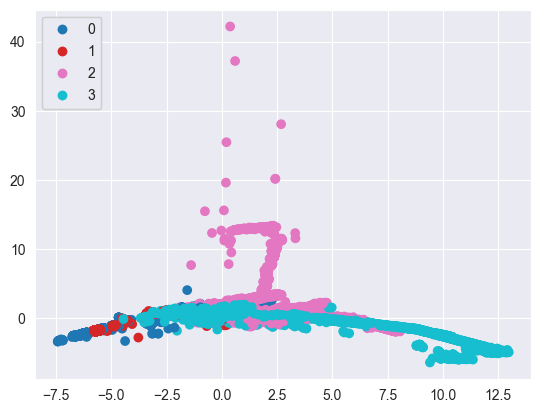

In [84]:
pca_scan = PCA(n_components = 2)

X_scan = scan_data.drop('attack',axis=1)
y_scan = scan_data['attack'].replace(scanlabel_dict)

X_embedded_scan = pca_scan.fit_transform(X_scan)

plt.set_cmap('tab10')

fig, ax = plt.subplots()
scatter = ax.scatter(X_embedded_scan[:,0],X_embedded_scan[:,1],c=y_scan)

legend = ax.legend(*scatter.legend_elements(),loc="upper left")
ax.add_artist(legend)

plt.show()
plt.close()

In [85]:
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'n_estimators': [50,100, 150,200,300],
    'max_depth': [None, 10, 20,30,40],
    'min_samples_split': [2, 5, 7,10],
    'max_features': ['sqrt', 'log2', None]
}


random_search_scan = RandomizedSearchCV(rfscan, param_distributions=param_dist, 
                                   n_iter=500, cv=5, scoring='accuracy', 
                                   n_jobs=-1, random_state=42)
random_search_scan.fit(scanxtrain, scanytrain)
random_search_scan.best_params_

d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 300 is smaller than n_iter=500. Running 300 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 300,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': None}

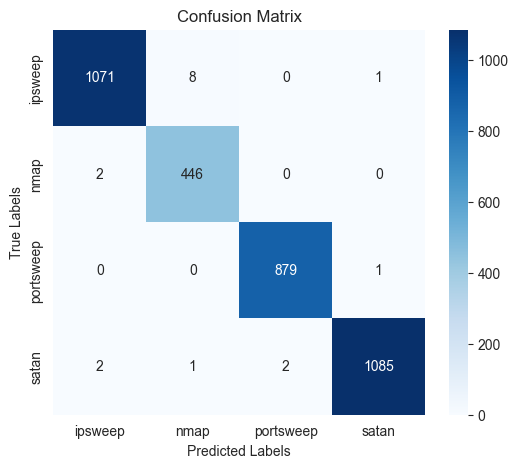

In [86]:
best_scan = random_search_scan.best_estimator_
y_pred_scan_best = best_scan.predict(scanxtest)
cmscanbest = confusion_matrix(scanytest, y_pred_scan_best)

plt.figure(figsize=(6, 5))
sns.heatmap(cmscanbest, annot=True, fmt='d', cmap='Blues',xticklabels=scan_labels, yticklabels=scan_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [66]:
# from sklearn.linear_model import LogisticRegression

# logreg_access = LogisticRegression(random_state=42,
#                                    multi_class='multinomial', solver='lbfgs',max_iter=1000)
# logreg_access.fit(access_xtrain_smote,access_ytrain_smote)
# y_pred_log_reg = logreg_access.predict(accessxtest)
# cmlogaccess = confusion_matrix(accessytest, y_pred_log_reg)

# plt.figure(figsize=(6, 5))
# sns.heatmap(cmlogaccess, annot=True, fmt='d', cmap='Blues',xticklabels=access_labels,yticklabels=access_labels)
# plt.xlabel('Predicted Labels')



# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()

In [67]:
# print(classification_report(accessytest, y_pred_log_reg,target_names=access_labels))

In [68]:
# from sklearn.model_selection import RandomizedSearchCV


# param_dist = {
#     'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
#     'solver': ['lbfgs', 'saga'],   # Solvers to consider
#     'max_iter': [100, 200, 300,400,500]    # Number of iterations for optimization
# }

# random_search_log_access = RandomizedSearchCV(logreg_access, param_distributions=param_dist, 
#                                    n_iter=700, cv=5, scoring='accuracy', 
#                                    n_jobs=-1, random_state=42)
# random_search_log_access.fit(access_xtrain_smote, access_ytrain_smote)
# best_log_access = random_search_log_access.best_estimator_
# y_pred_log_best = best_log_access.predict(accessxtest)


# cmbestlog = confusion_matrix(accessytest, y_pred_log_best)

# cmap = sns.color_palette("coolwarm", as_cmap=True)
# mask = np.eye(cmbestlog.shape[0], dtype=bool)

# # Plot the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(cmbestlog, annot=True, fmt='d', cmap=cmap, cbar=True, square=True, mask=mask, 
#             linecolor='black', linewidth=0.5,
#             xticklabels=access_labels, yticklabels=access_labels)  # Mask diagonal elements to hide them

# # Highlight off-diagonal values (you can choose a specific color for the off-diagonal)
# sns.heatmap(cmbestlog, annot=True, fmt='d', cmap='Blues', cbar=True, square=True, 
#             mask=~mask, linecolor='black', linewidth=0.5,
#             xticklabels=access_labels, yticklabels=access_labels) 

In [69]:
# access2 = RandomForestClassifier(random_state=42)
# access2.fit(access_xtrain_smote, access_ytrain_smote) 
# y_pred_access2= access2.predict(accessxtest)

# plt.figure(figsize=(6, 5))
# sns.heatmap(confusion_matrix(accessytest,y_pred_access2), annot=True, fmt='d', cmap='Blues',xticklabels=access_labels,yticklabels=access_labels)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()

In [70]:
# from sklearn.model_selection import RandomizedSearchCV


# param_dist = {
#     'n_estimators': [50,100, 150,200,300],
#     'max_depth': [None, 10, 20,30,40],
#     'min_samples_split': [2, 5, 7,10],
#     'max_features': ['sqrt', 'log2', None]
# }


# random_search_access = RandomizedSearchCV(rfaccess, param_distributions=param_dist, 
#                                    n_iter=500, cv=5, scoring='accuracy', 
#                                    n_jobs=-1, random_state=42)
# random_search_access.fit(access_xtrain_smote, access_ytrain_smote)
# #random_search_access.best_params_
# best_access = random_search_access.best_estimator_
# y_pred_access_best = best_access.predict(accessxtest)
# cmaccessbest = confusion_matrix(accessytest, y_pred_access_best)

# plt.figure(figsize=(6, 5))
# sns.heatmap(cmaccessbest, annot=True, fmt='d', cmap='Blues',xticklabels=access_labels, yticklabels=access_labels)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()

In [71]:
# from imblearn.ensemble import BalancedRandomForestClassifier

# brfaccess = BalancedRandomForestClassifier(random_state=42)
# brfaccess.fit(access_xtrain_smote, access_ytrain_smote)
# y_pred_access_brf= brfaccess.predict(accessxtest)
# cmbrfaccess = confusion_matrix(accessytest, y_pred_access_brf)

# plt.figure(figsize=(6, 5))
# sns.heatmap(cmbrfaccess, annot=True, fmt='d', cmap='Blues',xticklabels=access_labels,yticklabels=access_labels)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()

In [72]:
# from sklearn.model_selection import RandomizedSearchCV


# param_dist = {
#     'n_estimators': [50,100, 150,200,300],
#     'max_depth': [None, 10, 20,30,40],
#     'min_samples_split': [2, 5, 7,10],
#     'max_features': ['sqrt', 'log2', None]
# }


# random_search_brf_access = RandomizedSearchCV(brfaccess, param_distributions=param_dist, 
#                                    n_iter=500, cv=5, scoring='accuracy', 
#                                    n_jobs=-1, random_state=42)
# random_search_brf_access.fit(access_xtrain_smote, access_ytrain_smote)
# best_brf = random_search_brf_access.best_estimator_
# y_pred_access_brf = best_brf.predict(accessxtest)
# cmaccessbrf = confusion_matrix(accessytest, y_pred_access_brf)

# plt.figure(figsize=(6, 5))
# sns.heatmap(cmaccessbrf, annot=True, fmt='d', cmap='Blues',xticklabels=access_labels, yticklabels=access_labels)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()

In [73]:
# from sklearn.svm import SVC

# svm = SVC(kernel='rbf', C=1, gamma='scale')
# svm.fit(access_xtrain_smote, access_ytrain_smote)
# y_pred_svm = svm.predict(accessxtest)
# cmsvmaccess = confusion_matrix(accessytest, y_pred_svm)

# plt.figure(figsize=(6, 5))
# sns.heatmap(cmsvmaccess, annot=True, fmt='d', cmap='Blues',xticklabels=access_labels,yticklabels=access_labels)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()

In [74]:
# param_dist = {
#     'C': [0.1, 1, 10, 100],          # Regularization parameter
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # SVM kernel types
#     'gamma': ['scale', 'auto', 0.001, 0.01],        # Kernel coefficient
#     'class_weight': [None, 'balanced']               # To handle class imbalance
# }


# random_search_svm_access = RandomizedSearchCV(SVC(), param_distributions=param_dist, 
#                                    n_iter=700, cv=5, scoring='accuracy', 
#                                    n_jobs=-1, random_state=42)
# random_search_svm_access.fit(access_xtrain_smote, access_ytrain_smote)
# best_svm = random_search_svm_access.best_estimator_
# y_pred_access_svm = best_svm.predict(accessxtest)
# cmaccesssvm = confusion_matrix(accessytest, y_pred_access_svm)

# plt.figure(figsize=(6, 5))
# sns.heatmap(cmaccesssvm, annot=True, fmt='d', cmap='Blues',xticklabels=access_labels, yticklabels=access_labels)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()

In [75]:
# from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBClassifier


# param_dist = {
#     'n_estimators': [50,100, 150,200],
#     'max_depth': [3,4,5,7],
#     "learning_rate": [0.1, 0.2, 0.3],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0]
# }

# xgb_access = XGBClassifier(objective='multi:softmax', num_class=len(access_labels),random_state=42)

# random_search_xgb_access = RandomizedSearchCV(xgb_access, param_distributions=param_dist, 
#                                    n_iter=500, cv=5, scoring='accuracy', 
#                                    n_jobs=-1, random_state=42)
# random_search_xgb_access.fit(access_xtrain_smote, access_ytrain_smote)
# random_search_xgb_access.best_params_

In [76]:
# best_xgb = random_search_xgb_access.best_estimator_
# y_pred_xgb_best = best_xgb.predict(accessxtest)


# cmbestxgb = confusion_matrix(accessytest, y_pred_xgb_best)

# cmap = sns.color_palette("coolwarm", as_cmap=True)
# mask = np.eye(cmbestxgb.shape[0], dtype=bool)

# # Plot the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(cmbestxgb, annot=True, fmt='d', cmap=cmap, cbar=True, square=True, mask=mask, 
#             linecolor='black', linewidth=0.5,
#             xticklabels=access_labels, yticklabels=access_labels)  # Mask diagonal elements to hide them

# # Highlight off-diagonal values (you can choose a specific color for the off-diagonal)
# sns.heatmap(cmbestxgb, annot=True, fmt='d', cmap='Blues', cbar=True, square=True, 
#             mask=~mask, linecolor='black', linewidth=0.5,
#             xticklabels=access_labels, yticklabels=access_labels) 

In [77]:
# from sklearn.naive_bayes import GaussianNB

# gnb_access = GaussianNB()
# gnb_access.fit(accessxtrain, accessytrain)
# y_pred_access_gnb = gnb_access.predict(accessxtest)

# plt.figure(figsize=(6, 5))
# sns.heatmap(confusion_matrix(accessytest,y_pred_access_gnb), annot=True, fmt='d', cmap='Blues',xticklabels=access_labels,yticklabels=access_labels)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()

In [78]:
# param_grid = {
#     'var_smoothing': np.logspace(0, -9, num=100)  # Small smoothing values
# }


# random_search_gnb_access = RandomizedSearchCV(estimator=gnb_access, param_distributions=param_grid, cv=5, n_jobs=-1, verbose=1)
# random_search_gnb_access.fit(accessxtrain, accessytrain)
# random_search_gnb_access.best_params_
# best_gnb = random_search_gnb_access.best_estimator_
# y_pred_gnb_best = best_gnb.predict(accessxtest)


# cmbestgnb = confusion_matrix(accessytest, y_pred_gnb_best)

# cmap = sns.color_palette("coolwarm", as_cmap=True)
# mask = np.eye(cmbestgnb.shape[0], dtype=bool)

# # Plot the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(cmbestgnb, annot=True, fmt='d', cmap=cmap, cbar=True, square=True, mask=mask, 
#             linecolor='black', linewidth=0.5,
#             xticklabels=access_labels, yticklabels=access_labels)  # Mask diagonal elements to hide them

# # Highlight off-diagonal values (you can choose a specific color for the off-diagonal)
# sns.heatmap(cmbestgnb, annot=True, fmt='d', cmap='Blues', cbar=True, square=True, 
#             mask=~mask, linecolor='black', linewidth=0.5,
#             xticklabels=access_labels, yticklabels=access_labels) 

In [79]:
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(access_xtrain_smote, access_ytrain_smote)
# y_pred_knn = knn.predict(accessxtest)
# cmknnmaccess = confusion_matrix(accessytest, y_pred_knn)

# plt.figure(figsize=(6, 5))
# sns.heatmap(cmknnmaccess, annot=True, fmt='d', cmap='Blues',xticklabels=access_labels,yticklabels=access_labels)
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()

In [80]:
# param_grid_knn = {
#     'n_neighbors': [3, 5, 7, 9],              # Number of neighbors
#     'weights': ['uniform', 'distance'],       # Weighting strategy for neighbors
#     'metric': ['euclidean', 'manhattan']      # Distance metric
# }


# random_search_knn_access = RandomizedSearchCV(estimator=knn, param_distributions=param_grid_knn, cv=5, n_jobs=-1, verbose=1)
# random_search_knn_access.fit(access_xtrain_smote, access_ytrain_smote)
# random_search_knn_access.best_params_
# best_knn = random_search_knn_access.best_estimator_
# y_pred_knn_best = best_knn.predict(accessxtest)


# cmbestknn = confusion_matrix(accessytest, y_pred_knn_best)

# cmap = sns.color_palette("coolwarm", as_cmap=True)
# mask = np.eye(cmbestknn.shape[0], dtype=bool)

# # Plot the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(cmbestknn, annot=True, fmt='d', cmap=cmap, cbar=True, square=True, mask=mask, 
#             linecolor='black', linewidth=0.5,
#             xticklabels=access_labels, yticklabels=access_labels)  # Mask diagonal elements to hide them

# # Highlight off-diagonal values (you can choose a specific color for the off-diagonal)
# sns.heatmap(cmbestknn, annot=True, fmt='d', cmap='Blues', cbar=True, square=True, 
#             mask=~mask, linecolor='black', linewidth=0.5,
#             xticklabels=access_labels, yticklabels=access_labels) 

In [81]:
# print(classification_report(accessytest, y_pred_knn_best,target_names=access_labels))